<a href="https://colab.research.google.com/github/JohnComo/Data-Science-Projects/blob/main/NYC_Subway_and_Buildings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GIS in Python

In [ ]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install mapclassify #scaling color maps
!pip install geoplot;

In [ ]:
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt
import mapclassify as mc
import contextily as ctx

In [ ]:
url = "https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=GeoJSON"
subway_stations = gpd.read_file(url)

In [ ]:
subway_stations.head()

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913)
2,2-5,Morris Park Ave & 180th St at NW corner,1736,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122)
3,2-5,Morris Park Ave & 180th St at NW corner,1737,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145)
4,2-5,Boston Rd & 178th St at SW corner,1738,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082)


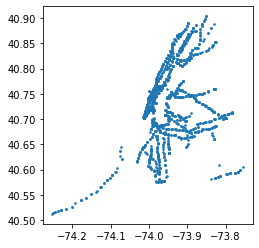

In [ ]:
subway_stations.plot(marker = '.', markersize = 10)

In [ ]:
type(subway_stations)

geopandas.geodataframe.GeoDataFrame

In [ ]:
subway_stations.geometry

0       POINT (-73.86836 40.84917)
1       POINT (-73.86821 40.84913)
2       POINT (-73.87350 40.84122)
3       POINT (-73.87289 40.84145)
4       POINT (-73.87962 40.84082)
                   ...            
1923    POINT (-73.95281 40.77619)
1924    POINT (-73.94747 40.78410)
1925    POINT (-73.94762 40.78392)
1926    POINT (-73.94773 40.78292)
1927    POINT (-73.94824 40.78297)
Name: geometry, Length: 1928, dtype: geometry

In [ ]:
#coordinate reference system
subway_stations.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

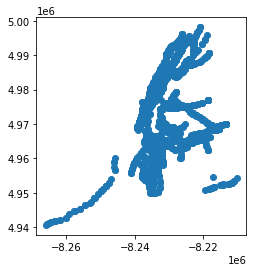

In [ ]:
#Use a new CRS sytem 
subway_stations.to_crs(crs = 3857).plot()

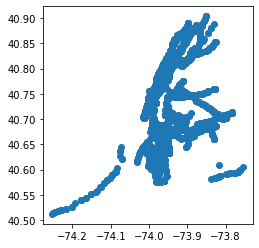

In [ ]:
subway_stations.plot()

In [ ]:
#notice the difference in coordinates 
# https://docs.qgis.org/3.16/en/docs/gentle_gis_introduction/coordinate_reference_systems.html 
# for reference 

In [ ]:
subway_stations.shape

(1928, 5)

In [ ]:
subway_stations.head()

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734,http://web.mta.info/nyct/service/,POINT (-73.86836 40.84917)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735,http://web.mta.info/nyct/service/,POINT (-73.86821 40.84913)
2,2-5,Morris Park Ave & 180th St at NW corner,1736,http://web.mta.info/nyct/service/,POINT (-73.87350 40.84122)
3,2-5,Morris Park Ave & 180th St at NW corner,1737,http://web.mta.info/nyct/service/,POINT (-73.87289 40.84145)
4,2-5,Boston Rd & 178th St at SW corner,1738,http://web.mta.info/nyct/service/,POINT (-73.87962 40.84082)


In [ ]:
subway_stations['line'].unique()
#now we have a better understanding of line in our data

array(['2-5', '3', '2-3', '7', 'N-Q-7', 'E-G-M-7', 'B-D-F-M-7', 'R-1',
       'N-Q-R-4-5-6', 'N-Q-R', 'A-C-E-N-Q-R-S-1-2-3-7', 'B-D-F-M-N-Q-R',
       'N-R', 'L-N-Q-R-4-5-6', 'J-N-Q-R-Z-6', 'B-Q', 'Q', 'F-Q',
       'D-F-N-Q', 'D', 'N', 'D-N', 'J-Z', 'J', 'J-M-Z', 'J-M', 'F-J-M-Z',
       'M', 'A-C-E-L', 'L', 'B-D-E', 'E-J-Z', 'E', 'G', 'G-L', '1', 'SIR',
       '1-2-3', 'F-L-M-1-2-3', 'J-Z-4-5-6', 'A-C-J-Z-2-3-4-5', 'L-M', 'A',
       'A-C', 'A-B-C-D', 'B-C', 'A-B-C-D-1', 'C-E', 'A-C-E',
       'A-B-C-D-E-F-M', 'A-C-E-2-3', 'A-C-F-R', 'C', 'A-C-FS', 'B-D',
       'B-D-4', 'B-D-F-M', 'F-M', 'B-D-F-M-6', 'F', 'F-G', 'E-F',
       'e-F-M-R', 'E-F-M-R', 'M-R', 'E-F-M-R-7', 'R-2-3-4-5', '2-3-4-5',
       'B-D-N-Q-R-2-3-4-5', 'FS-2-3-4-5', '3-4', '6', '4', '2-4-5', '4-5',
       '4-5-6', 'A-C-G', 'A-C-J-L', 'E-M-R', 'E-M-6', 'E-M', 'A-H', 'H',
       'F-G-R', 'A-FS', 'FS', 'A-C-1', 'B -D-4', 'GS-4-5-6-7',
       'A-C-E-N-Q-R-GS-1-2-3-7', '5', 'N-Q', 'R', 'B-Q-R',
       'B-Q-D-N-R-2-3-4-5',

In [ ]:
#new data for the lines of the trains 
url = 'https://data.cityofnewyork.us/api/geospatial/3qz8-muuu?method=export&format=GeoJSON'
subway_lines = gpd.read_file(url)
subway_lines.head()
#we see this geomr col has more coords than prev data

,name,url,rt_symbol,objectid,id,shape_len,geometry
0,G,http://web.mta.info/nyct/service/,G,753,2000393,2438.20024902,"LINESTRING (-73.99488 40.68020, -73.99427 40.6..."
1,G,http://web.mta.info/nyct/service/,G,754,2000394,3872.83441063,"LINESTRING (-73.97958 40.65993, -73.97966 40.6..."
2,Q,http://web.mta.info/nyct/service/,N,755,2000469,1843.36633108,"LINESTRING (-73.97586 40.57597, -73.97654 40.5..."
3,M,http://web.mta.info/nyct/service/,B,756,2000294,1919.5592029,"LINESTRING (-73.92414 40.75229, -73.92405 40.7..."
4,M,http://web.mta.info/nyct/service/,B,757,2000296,2385.69853589,"LINESTRING (-73.91345 40.75617, -73.90905 40.7..."


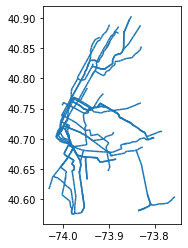

In [ ]:
subway_lines.plot()

In [ ]:
subway_lines.geometry

0      LINESTRING (-73.99488 40.68020, -73.99427 40.6...
1      LINESTRING (-73.97958 40.65993, -73.97966 40.6...
2      LINESTRING (-73.97586 40.57597, -73.97654 40.5...
3      LINESTRING (-73.92414 40.75229, -73.92405 40.7...
4      LINESTRING (-73.91345 40.75617, -73.90905 40.7...
                             ...                        
737    LINESTRING (-73.94113 40.70035, -73.94217 40.7...
738    LINESTRING (-73.95836 40.76880, -73.95787 40.7...
739    LINESTRING (-73.97950 40.76625, -73.97865 40.7...
740    LINESTRING (-73.94014 40.75069, -73.93989 40.7...
741    LINESTRING (-73.96465 40.76420, -73.96452 40.7...
Name: geometry, Length: 742, dtype: geometry

In [ ]:
subway_lines.crs
#is the same which makes sense bc it is from same source 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
print(subway_lines.shape)
print(subway_stations.shape)

(742, 7)
(1928, 5)


In [ ]:
print(subway_lines.columns)
print(subway_stations.columns)

Index(['name', 'url', 'rt_symbol', 'objectid', 'id', 'shape_len', 'geometry'], dtype='object')
Index(['line', 'name', 'objectid', 'url', 'geometry'], dtype='object')


In [ ]:
subway_lines['shape_len']
#examine this column because not in stations

0      2438.20024902
1      3872.83441063
2      1843.36633108
3       1919.5592029
4      2385.69853589
           ...      
737    4198.26264126
738    3779.62004576
739    2797.02138975
740    2194.71893052
741    845.118169242
Name: shape_len, Length: 742, dtype: object

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


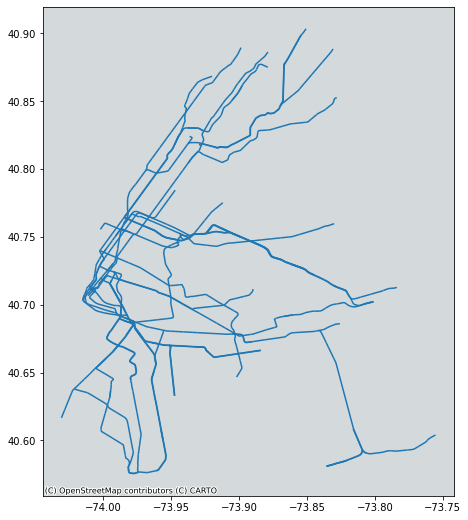

In [ ]:
#start new plot
fig, ax = plt.subplots(figsize = (9,9))

subway_lines.plot(ax = ax)

#now add base map which subplots will go on top of 
ctx.add_basemap(ax, source = ctx.providers.CartoDB.Positron)

In [ ]:
subway_lines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

(-74.05, -73.74)

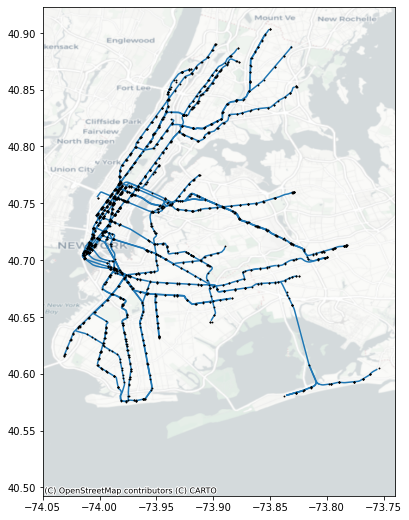

In [ ]:
#we see no background bc of crs is not specified so we will adjust from EPSG
fig, ax = plt.subplots(figsize = (9,9))

subway_lines.plot(ax = ax,
                  zorder = 1) #controls theorder of layering, lower first

subway_stations.plot(ax=ax, 
                     marker ='.', 
                     markersize = 3, 
                     color = 'black', 
                     zorder = 2)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.Positron, crs = 4326)

ax.set_xlim([-74.05 ,-73.74 ]) #resize and zoom in on desired area

In [ ]:
#now lets color code subway stations 
subway_lines.head()

,name,url,rt_symbol,objectid,id,shape_len,geometry
0,G,http://web.mta.info/nyct/service/,G,753,2000393,2438.20024902,"LINESTRING (-73.99488 40.68020, -73.99427 40.6..."
1,G,http://web.mta.info/nyct/service/,G,754,2000394,3872.83441063,"LINESTRING (-73.97958 40.65993, -73.97966 40.6..."
2,Q,http://web.mta.info/nyct/service/,N,755,2000469,1843.36633108,"LINESTRING (-73.97586 40.57597, -73.97654 40.5..."
3,M,http://web.mta.info/nyct/service/,B,756,2000294,1919.5592029,"LINESTRING (-73.92414 40.75229, -73.92405 40.7..."
4,M,http://web.mta.info/nyct/service/,B,757,2000296,2385.69853589,"LINESTRING (-73.91345 40.75617, -73.90905 40.7..."


In [ ]:
#unsure of what to name or rt_symbol 
print(subway_lines['name'].unique())
print(subway_lines['rt_symbol'].unique())

['G' 'Q' 'M' 'S' 'A' 'B-D' 'B-D-F-M' 'R' 'N-Q-R' 'N-Q' 'N-R' 'F' 'F-M' 'E'
 '7' 'J-Z' 'L' 'A-C' 'D' '1-2-3' 'B' '4-5-6' 'N' '1' 'N-W' '2-3' '2' '4-5'
 '5' '4' '3' 'A-C-E' 'N-Q-R-W' 'N-R-W' '6' 'R-W']
['G' 'N' 'B' 'L' 'A' '7' 'J' '1' '4']


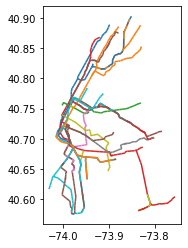

In [ ]:
#we know we want to use rt_symbol 
subway_lines.plot(column = 'rt_symbol')

(-74.05, -73.74)

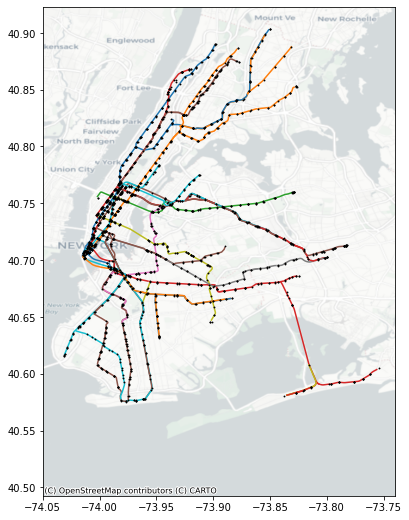

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))

subway_lines.plot(ax = ax,
                  column = 'rt_symbol',
                  zorder = 1) 

subway_stations.plot(ax=ax, 
                     marker ='.', 
                     markersize = 3, 
                     color = 'black', 
                     zorder = 2)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.Positron, crs = 4326)

ax.set_xlim([-74.05 ,-73.74 ]) 

In [ ]:
#the colors are randomly assigned but we want them to correlate to real life subway station color
lines = subway_lines['rt_symbol'].unique()
colors = ['lightgreen', 'yellow', 'orange', 'grey', 'blue', 'violet', 'brown', 'red', 'green']

for i in range(len(lines)): 
  print(lines[i])
  print (colors[i])

G
lightgreen
N
yellow
B
orange
L
grey
A
blue
7
violet
J
brown
1
red
4
green


(-74.05, -73.74)

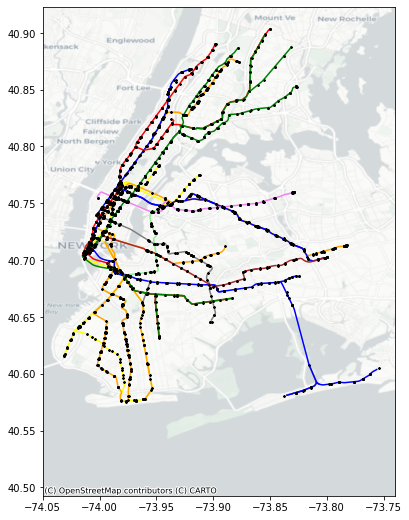

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
for i in range(len(lines)): 
  subway_lines.loc[subway_lines['rt_symbol'] == lines[i]].plot(ax = ax, 
                                                               colors = colors[i])
  
  subway_stations.plot(ax=ax, 
                     marker ='.', 
                     markersize = 3, 
                     color = 'black', 
                     zorder = 2)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.Positron, crs = 4326)

ax.set_xlim([-74.05 ,-73.74 ]) 

In [ ]:
%%time
url = 'https://data.cityofnewyork.us/api/geospatial/nqwf-w8eh?method=export&format=GeoJSON'
buildings = gpd.read_file(url)
buildings.head()

CPU times: user 2min 49s, sys: 6.78 s, total: 2min 56s
Wall time: 5min 13s


Look into CDC cloropleth maps and other maps on cdc site @https://www.cdc.gov/dhdsp/maps/gisx/resources/thematic-maps.html

In [ ]:
buildings.head()

,name,base_bbl,shape_area,heightroof,mpluto_bbl,cnstrct_yr,lststatype,feat_code,groundelev,geomsource,bin,lstmoddate,doitt_id,shape_len,geometry
0,None,3044520815,854.66243317866,21.60850812,3044520815,2009,Constructed,2100,18,Photogramm,3394646,2017-08-22T00:00:00+00:00,1212853,125.0797955584,"MULTIPOLYGON (((-73.87130 40.65717, -73.87136 ..."
1,None,4030640041,217.59424346169,10.36,4030640041,1930,Constructed,5110,122,Photogramm,4548330,2017-08-17T00:00:00+00:00,1226227,60.22585821856,"MULTIPOLYGON (((-73.87671 40.71425, -73.87677 ..."
2,None,4139430001,946.42747637737,29.81157033,4139430001,1960,Constructed,2100,10,Photogramm,4460479,2017-08-22T00:00:00+00:00,581946,123.14194057237,"MULTIPOLYGON (((-73.85195 40.66235, -73.85195 ..."
3,None,3049720006,248.67816852809,11.2,3049720006,1920,Constructed,5110,32,Photogramm,3355684,2017-08-17T00:00:00+00:00,858061,63.94081721089,"MULTIPOLYGON (((-73.94029 40.64108, -73.94034 ..."
4,None,3055100055,1163.227668698,24.98,3055100055,1915,Constructed,2100,44,Photogramm,3131737,2017-08-22T00:00:00+00:00,568078,165.60876340496,"MULTIPOLYGON (((-73.98999 40.62384, -73.98998 ..."


In [ ]:
#documentation https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md
buildings.shape

(1117797, 15)

In [ ]:
unique_buildings = buildings['bin'].unique()
print(unique_buildings.shape)
print(buildings.shape)

(1084802,)
(1117797, 15)


In [ ]:
buildings['heightroof'].head()

0    21.60850812
1          10.36
2    29.81157033
3           11.2
4          24.98
Name: heightroof, dtype: object

In [ ]:
type(buildings['heightroof'][0])

str

In [ ]:
#we now need to convert the series to numbers 
pd.to_numeric(buildings['heightroof']).quantile([.25, .5, .75])

0.25    18.308015
0.50    26.070000
0.75    31.050000
Name: heightroof, dtype: float64

In [ ]:
top_buildings = buildings.loc[pd.to_numeric(buildings['heightroof']) >= 31.05]

In [ ]:
top_buildings.shape

(279017, 15)

In [ ]:
pd.to_numeric(buildings['heightroof']).quantile([.90, .98, .99, .999, .9999])

0.9000     38.920000
0.9800     67.010000
0.9900     85.272561
0.9990    284.747760
0.9999    601.054424
Name: heightroof, dtype: float64

In [ ]:
tall_buildings = buildings.loc[pd.to_numeric(buildings['heightroof']) >= 85.3]

In [ ]:
v_tall_buildings = buildings.loc[pd.to_numeric(buildings['heightroof']) >= 284.747760]

In [ ]:
vv_tall_buildings = buildings.loc[pd.to_numeric(buildings['heightroof']) >= 601.054424]

In [ ]:
print(len(tall_buildings))
print(len(v_tall_buildings))
print(len(vv_tall_buildings))

11142
1116
112


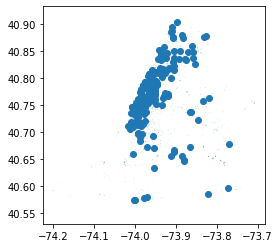

In [ ]:
tall_buildings.plot()

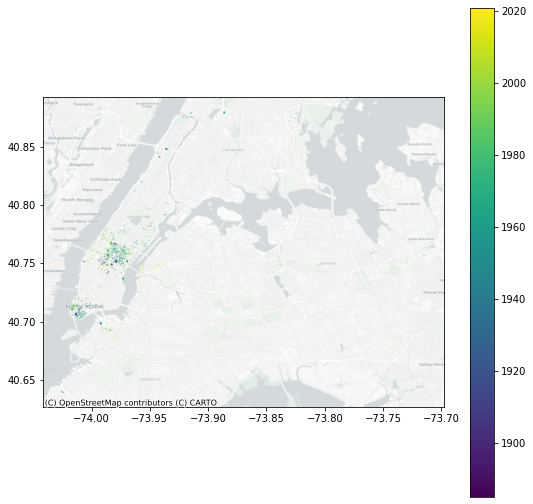

In [90]:
fig, ax = plt.subplots(figsize = (9,9))

v_tall_buildings.plot(ax = ax, 
                    column = 'construction_year_num', 
                    legend = True, 
                    marker = '.', 
                    markersize = 5)

ctx.add_basemap(ax, 
                crs = 4326, 
                source = ctx.providers.CartoDB.Positron)

0      MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...
1      MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...
2      MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...
3      MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...
4      MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...
                             ...                        
190    MULTIPOLYGON (((-73.86791 40.74493, -73.86788 ...
191    MULTIPOLYGON (((-73.89175 40.74681, -73.89139 ...
192    MULTIPOLYGON (((-74.09777 40.61062, -74.09730 ...
193    MULTIPOLYGON (((-74.06503 40.58899, -74.06503 ...
194    MULTIPOLYGON (((-74.11813 40.55059, -74.11656 ...
Name: geometry, Length: 195, dtype: geometry

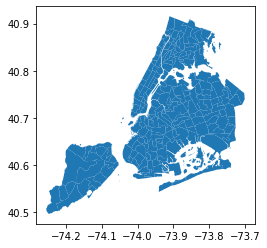

In [92]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta = gpd.read_file(url)
nta.plot()
nta.geometry

In [89]:
tall_buildings['construction_year_num'] = pd.to_numeric(tall_buildings['cnstrct_yr'])
v_tall_buildings['construction_year_num'] = pd.to_numeric(tall_buildings['cnstrct_yr'])
vv_tall_buildings['construction_year_num'] = pd.to_numeric(tall_buildings['cnstrct_yr'])


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


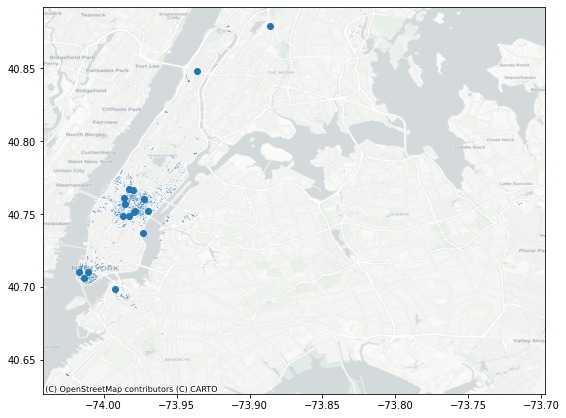

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))

v_tall_buildings.plot(ax = ax)

ctx.add_basemap(ax, 
                crs = 4326, 
                source = ctx.providers.CartoDB.Positron)

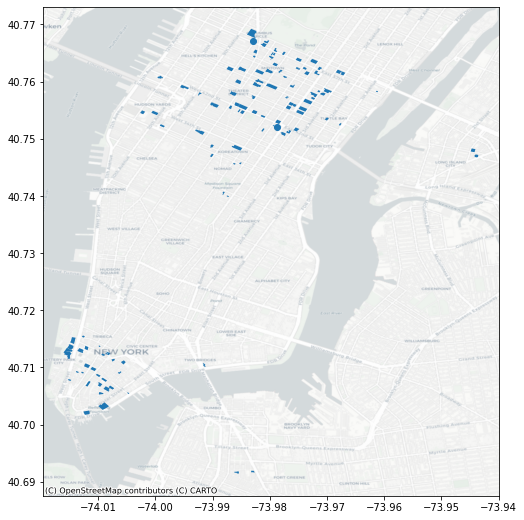

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))

vv_tall_buildings.plot(ax = ax)

ctx.add_basemap(ax, 
                crs = 4326, 
                source = ctx.providers.CartoDB.Positron)

(40.6, 40.9)

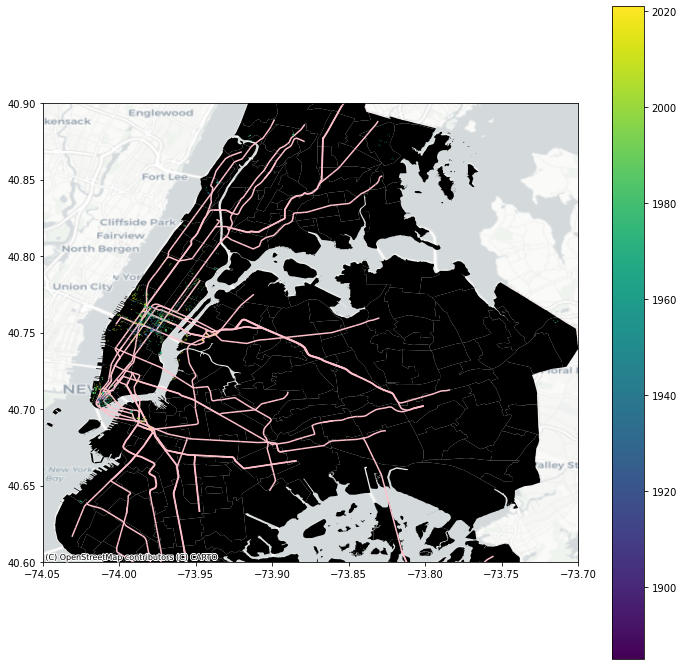

In [100]:
fig, ax = plt.subplots(figsize = (12,12))

v_tall_buildings.plot(ax = ax, 
                    column = 'construction_year_num', 
                    legend = True, 
                    marker = '.', 
                    markersize = 5, 
                    zorder=3)
subway_lines.plot(ax = ax, 
                  zorder = 2, 
                  color = 'pink')

nta.plot(ax=ax, 
         zorder=1, 
         color='black')

ctx.add_basemap(ax, 
                crs = 4326, 
                source = ctx.providers.CartoDB.Positron)

ax.set_xlim([-74.05,-73.7])
ax.set_ylim([40.6, 40.9])

In [ ]:
#we can see the outmost tall buildings have subway lines connected directly to them and the 
#subway follows along the tallest 1% of buildings

(40.6, 40.9)

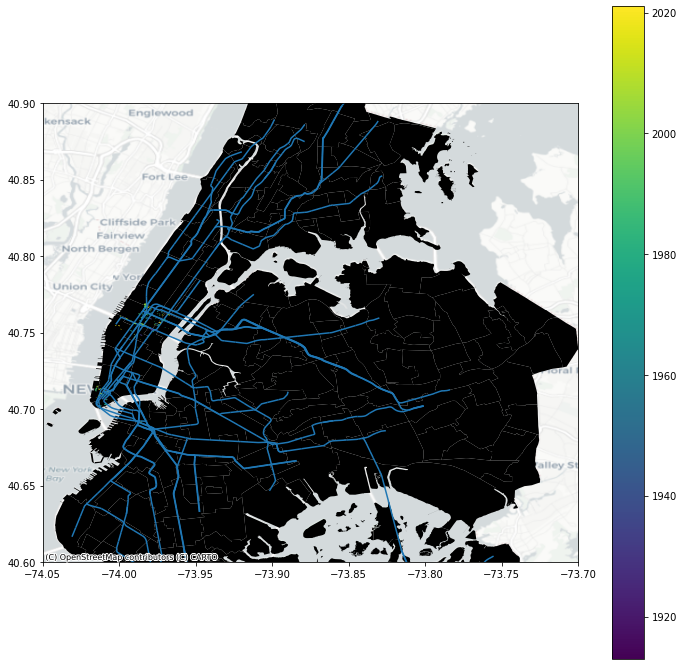

In [103]:
fig, ax = plt.subplots(figsize = (12,12))

vv_tall_buildings.plot(ax = ax, 
                    column = 'construction_year_num', 
                    legend = True, 
                    marker = '.', 
                    markersize = 5, 
                    zorder=3)
subway_lines.plot(ax = ax, 
                  zorder = 2, 
                  )

nta.plot(ax=ax, 
         zorder=1, 
         color='black')

ctx.add_basemap(ax, 
                crs = 4326, 
                source = ctx.providers.CartoDB.Positron)

ax.set_xlim([-74.05,-73.7])
ax.set_ylim([40.6, 40.9])


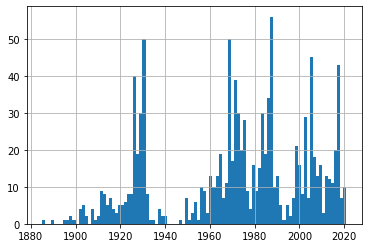

In [106]:
v_tall_buildings['construction_year_num'].hist(bins=100)